In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from scipy import stats
import statsmodels.api as sm
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

In [2]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

houseprices_df = pd.read_sql_query('select * from houseprices',con=engine)

engine.dispose()

houseprices_df.head(10)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,...,0,None,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,None,IR1,Lvl,AllPub,...,0,None,None,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,1,2008,WD,Normal,118000


#### Investigate the data, and do any necessary data cleaning.

In [3]:
houseprices_df.describe()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
houseprices_df.info()
houseprices_df.isna().count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1460 non-null   int64  
 1   mssubclass     1460 non-null   int64  
 2   mszoning       1460 non-null   object 
 3   lotfrontage    1201 non-null   float64
 4   lotarea        1460 non-null   int64  
 5   street         1460 non-null   object 
 6   alley          91 non-null     object 
 7   lotshape       1460 non-null   object 
 8   landcontour    1460 non-null   object 
 9   utilities      1460 non-null   object 
 10  lotconfig      1460 non-null   object 
 11  landslope      1460 non-null   object 
 12  neighborhood   1460 non-null   object 
 13  condition1     1460 non-null   object 
 14  condition2     1460 non-null   object 
 15  bldgtype       1460 non-null   object 
 16  housestyle     1460 non-null   object 
 17  overallqual    1460 non-null   int64  
 18  overallc

id               1460
mssubclass       1460
mszoning         1460
lotfrontage      1460
lotarea          1460
                 ... 
mosold           1460
yrsold           1460
saletype         1460
salecondition    1460
saleprice        1460
Length: 81, dtype: int64

In [5]:
#Find Uniqe Values
for column in houseprices_df.columns:
    print('****')
    print('The unique values in column {} are: {}'.format(column, houseprices_df[column].unique()))
    print('****')

****
The unique values in column id are: [   1    2    3 ... 1458 1459 1460]
****
****
The unique values in column mssubclass are: [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
****
****
The unique values in column mszoning are: ['RL' 'RM' 'C (all)' 'FV' 'RH']
****
****
The unique values in column lotfrontage are: [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
****
****
The unique values in column lotarea are: [ 8450  9600 11250 ... 17217 13175  9717]
****
****
T

In [6]:
fill_columns_continous = [ 'lotfrontage', 'masvnrarea', 'bsmtfinsf2', 'garageyrblt',  'saleprice']

for col in fill_columns_continous:
    houseprices_df.loc[:, col] = houseprices_df.loc[:, col].fillna(houseprices_df.loc[:,col].mean())

In [7]:
fill_columns_categorical_string = ['alley',  'masvnrtype','bsmtqual','bsmtcond','bsmtexposure', 'bsmtfintype1',  'bsmtfintype2',
                           'electrical', 'fireplacequ', 'garagetype','garagefinish', 'garagequal', 'garagecond', 'poolqc',
                           'fence', 'miscfeature', 'saletype', 'salecondition']

for col in fill_columns_categorical_string:
    houseprices_df.loc[:, col] = houseprices_df.loc[:, col].fillna('Information Not Available')

In [8]:
houseprices_df.info()
houseprices_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1460 non-null   int64  
 1   mssubclass     1460 non-null   int64  
 2   mszoning       1460 non-null   object 
 3   lotfrontage    1460 non-null   float64
 4   lotarea        1460 non-null   int64  
 5   street         1460 non-null   object 
 6   alley          1460 non-null   object 
 7   lotshape       1460 non-null   object 
 8   landcontour    1460 non-null   object 
 9   utilities      1460 non-null   object 
 10  lotconfig      1460 non-null   object 
 11  landslope      1460 non-null   object 
 12  neighborhood   1460 non-null   object 
 13  condition1     1460 non-null   object 
 14  condition2     1460 non-null   object 
 15  bldgtype       1460 non-null   object 
 16  housestyle     1460 non-null   object 
 17  overallqual    1460 non-null   int64  
 18  overallc

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,Information Not Available,Reg,Lvl,AllPub,...,0,Information Not Available,Information Not Available,Information Not Available,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Information Not Available,Reg,Lvl,AllPub,...,0,Information Not Available,Information Not Available,Information Not Available,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Information Not Available,IR1,Lvl,AllPub,...,0,Information Not Available,Information Not Available,Information Not Available,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Information Not Available,IR1,Lvl,AllPub,...,0,Information Not Available,Information Not Available,Information Not Available,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Information Not Available,IR1,Lvl,AllPub,...,0,Information Not Available,Information Not Available,Information Not Available,0,12,2008,WD,Normal,250000


There are no significant outliers in the features that will be selected. It will be safe to proceed.

Explore the data and find some variables that you think would be useful in predicting house prices.

The following variables will be selected which may be usefull in predicting house prices:
- Sales Price
- Lot Area
- Lot Frontage

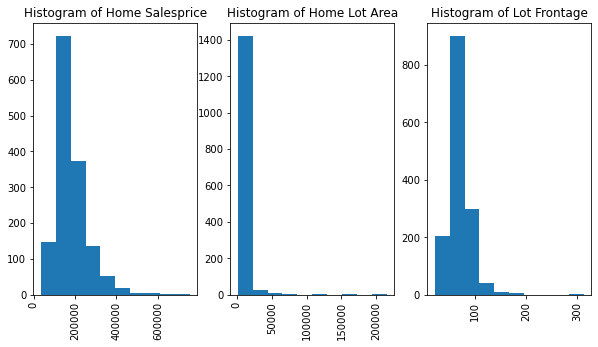

In [9]:
plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
plt.hist(houseprices_df['saleprice'])
plt.title('Histogram of Home Salesprice')
plt.xticks(rotation='vertical')

plt.subplot(1,3,2)
plt.hist(houseprices_df['lotarea'])
plt.title('Histogram of Home Lot Area')
plt.xticks(rotation='vertical')

plt.subplot(1,3,3)
plt.hist(houseprices_df['lotfrontage'])
plt.title('Histogram of Lot Frontage')
plt.xticks(rotation='vertical')

plt.show()

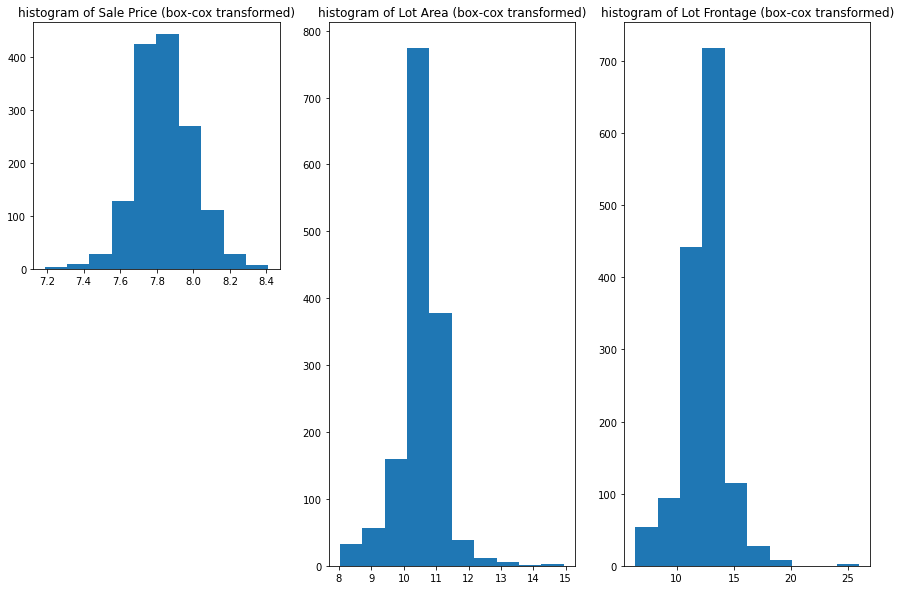

In [14]:
#Transform to Normal Distributionusung Box-Cox Transformation

from scipy.stats import boxcox

saleprice_boxcox,_ = boxcox(houseprices_df['saleprice'])
lotarea_boxcox,_ = boxcox(houseprices_df['lotarea'])
lotfrontage_boxcox,_ = boxcox(houseprices_df['lotfrontage'])

plt.figure(figsize=(15,10))

plt.subplot(2, 3, 1)
plt.hist(saleprice_boxcox)
plt.title("histogram of Sale Price (box-cox transformed)")

plt.subplot(1, 3, 2)
plt.hist(lotarea_boxcox)
plt.title("histogram of Lot Area (box-cox transformed)")

plt.subplot(1, 3, 3)
plt.hist(lotfrontage_boxcox)
plt.title("histogram of Lot Frontage (box-cox transformed)")

plt.show()

#### Build your initial model using these features and estimate the parameters using OLS.

In [12]:
X = houseprices_df[['lotarea', 'lotfrontage']]
Y = houseprices_df['saleprice']

In [13]:
X = sm.add_constant(X)

result = sm.OLS(Y, X).fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     119.4
Date:                Wed, 05 Aug 2020   Prob (F-statistic):           9.66e-49
Time:                        16:28:41   Log-Likelihood:                -18433.
No. Observations:                1460   AIC:                         3.687e+04
Df Residuals:                    1457   BIC:                         3.689e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         9.52e+04   6433.779     14.797      0.000    8.26e+04    1.08e+05
lotarea         1.4154      0.203      6.970      0.000       1.017       1.814
lotfrontage  1011.2162     92.032     10.988      0.000     830.688    1191.745
==============================================================================
Omnibus:                      516.977   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2636.744
Skew:                           1.582   Prob(JB):                         0.00
Kurtosis:                       8.774   Cond. No.                     4.84e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.84e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""